# Python SDK to access the ZhipuAI CogView Drawing API

**This tutorial is available in English and is attached below the Chinese explanation**

此代码将讲述如何使用Python SDK 调用 CogView-3 API，来完成简单的绘图工作。

This cookbook will describe how to use the Python SDK to call the CogView-3 API to complete simple drawing work.

## Simple python SDK request
首先，我们设置好 API KEY，并将这个API KEY设置为环境变量，这样我们就可以在代码中直接调用了。

First, we set up the API KEY and set this API KEY as an environment variable so that we can call it directly in the code.

In [1]:
import os
from zhipuai import ZhipuAI

os.environ["ZHIPUAI_API_KEY"] = "your api key"
client = ZhipuAI()

我们通过一个简单的请求，完成一张简单的绘图工作。根据[官方文档](https://open.bigmodel.cn/dev/api#multimodal), 目前仅有 `cogview-3` 一个模型能够调用。经过测试，这个模型生成的速度较慢，需要等待一段时间才能得到结果。

We complete a simple drawing through a simple request. According to [official documentation](https://open.bigmodel.cn/dev/api#multimodal), currently only `cogview-3` can be called. After testing, this model is generated slowly and it takes a while to get the results.

In [2]:
response_cogview = client.images.generations(model="cogview-3", prompt="一个城市在水晶瓶中的场景。")
response_cogview

ImagesResponded(created=1706092666, data=[GeneratedImage(b64_json=None, url='https://sfile.chatglm.cn/testpath/7e803f37-32fa-5e0d-945e-b29b8f17c403_0.png', revised_prompt=None)])

我们需要将这个结果转换成图片，这样我们才能看到结果。我们从结果中提取出图片的URL，然后通过`requests`库将图片下载下来，最后通过`PIL`库将图片打开。

We need to convert this result into a picture so we can see the result. We extract the URL of the image from the results, then download the image through the `requests` library, and finally open the image through the `PIL` library.

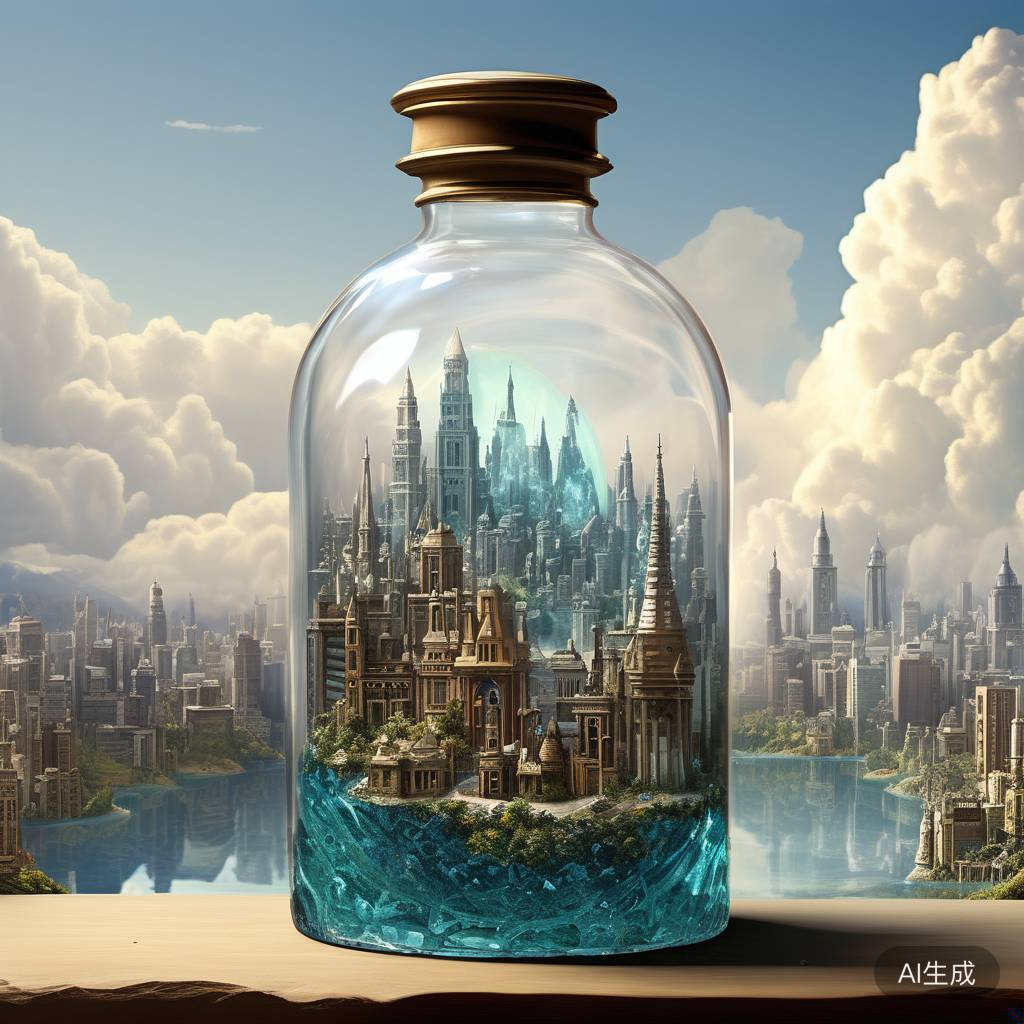

In [3]:
import requests
from PIL import Image
from io import BytesIO

response = requests.get(response_cogview.data[0].url)
image_cogview = Image.open(BytesIO(response.content))
image_cogview

## 提示词的艺术

`cogview-3` 模型对提示词比较敏感。使用优雅的提示词能非常有效的激发模型生成图像的能力。仅需在`prompt`中设定好更加优雅的提示词，我们就能获得更好的效果。

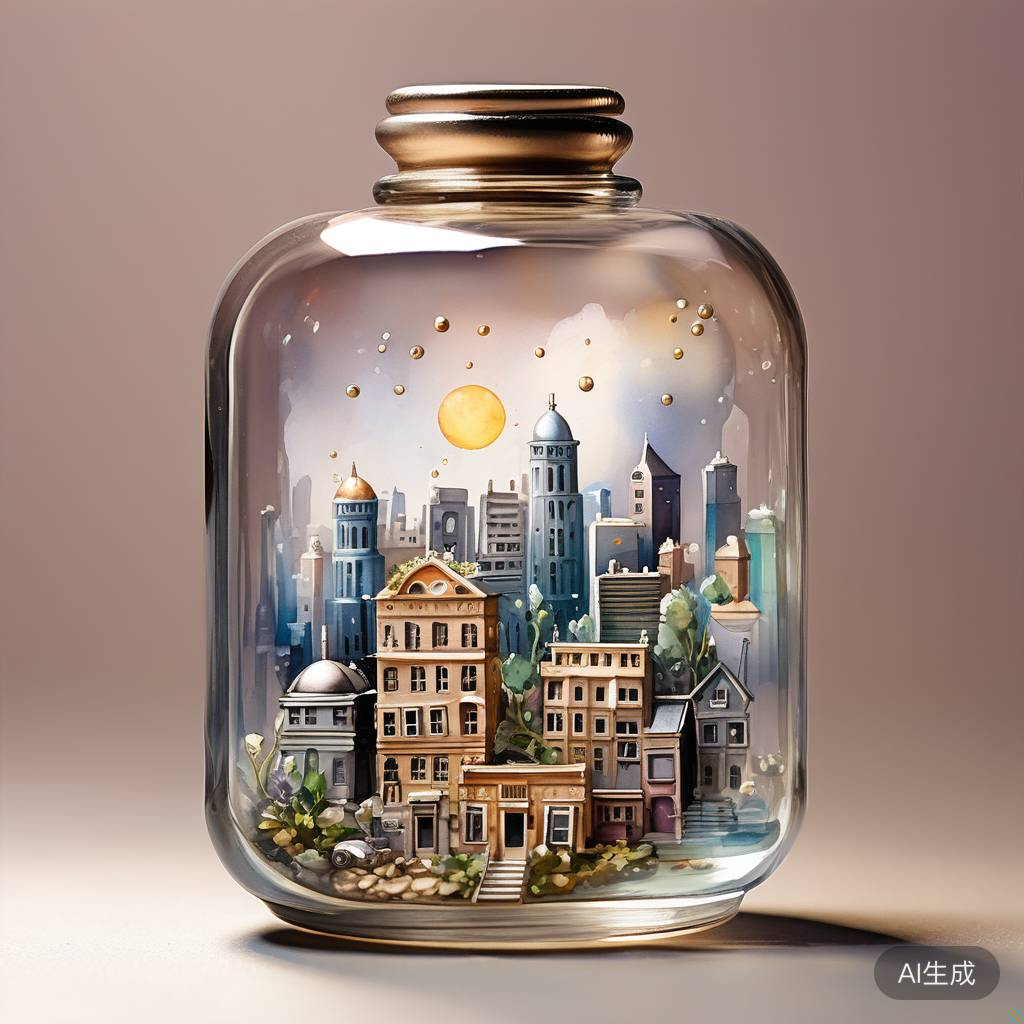

In [4]:
response_cogview_better_prompt = client.images.generations(model="cogview-3",
                                                           prompt="一个城市在水晶瓶中欢快生活的场景，水彩画风格，展现出微观与珠宝般的美丽。")
response = requests.get(response_cogview_better_prompt.data[0].url)
image_cogview_better_prompt = Image.open(BytesIO(response.content))
image_cogview_better_prompt

## Set more parameters to make the model generation more representative

<span style='color: red; font-weight: bold;'>⚠️ 此部分教程当前版本 ZhipuAI API 还没有支持，以后再来探索吧 ⚠️</span>

<span style='color: red; font-weight: bold;'>⚠️ This part is not supported by the current version of ZhipuAI API, please explore it later ⚠️</span>

我们可以设置不同的参数，让模型返回不同的结果，例如，我希望能生成更高质量的图片，那么我可以设置quality参数为`hd`。
这些参数有着不同的含义，例如：
`n` :生成图片的数量
`quality` :生成图片的质量，有 `standard` 和 `hd` 两个选项。
`size` :生成图片的大小，有 `256x256`, `512x512`, `1024x1024`, `1792x1024`, `1024x1792` 五个选项。
`style` : 生成图像的风格，有 `vivid`, `natural` 两个选项。 

通过设置这些参数，在相同的提示词下，我们会得到更好的图片结果。

We can set different parameters to let the model return different results. For example, if I hope to generate higher quality pictures, then I can set the quality parameter to `hd`.
These parameters have different meanings, such as:
`n`: Number of generated images
`quality`: The quality of the generated image, there are two options: `standard` and `hd`.
`size`: The size of the generated image, there are five options: `256x256`, `512x512`, `1024x1024`, `1792x1024`, `1024x1792`.
`style`: The style of the generated image, there are two options: `vivid` and `natural`.

By setting these parameters, we will get better picture results under the same prompt words.

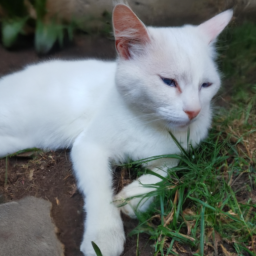

In [5]:
response_small = client.images.generations(
    model="cogview-3",
    prompt="a white cat",
    size="256x256",
    style="vivid",
    quality="hd",
    n=1,
)
response = requests.get(response_small.data[0].url)
image = Image.open(BytesIO(response.content))
image

我们还能设置参数 `response_format="b64_json",` 使得模型返回的图像为 `base64` 编码的字符串，这样我们就能直接在代码中使用这个字符串抓换为图像，而不需要下载图片了。

We can also set the parameter `response_format="b64_json",` so that the image returned by the model is a `base64` encoded string, so that we can use this string to capture and convert it into an image directly in the code without downloading the image. 

In [6]:
response_base64 = client.images.generations(
    response_format="b64_json",
    model="cogview-3",
    prompt="house",
    size="256x256",
    quality="hd",
    n=1,
)

将返回的内容转换能直接显示的图片，并直接展示。

Convert the returned content into a picture that can be directly displayed and display it directly.

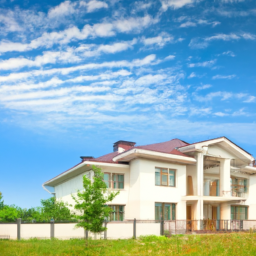

In [7]:
import base64
from io import BytesIO
from PIL import Image
import json

example_b64_json = base64.b64encode(json.dumps({"image_data": response_base64.data[0].b64_json}).encode()).decode()
decoded_json = base64.b64decode(example_b64_json)
decoded_json_data = json.loads(decoded_json)
image_data = base64.b64decode(decoded_json_data["image_data"])
image = Image.open(BytesIO(image_data))
image